In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)




In [81]:
# Read the data
df = pd.read_csv(r"/content/sample_data/movies.csv")
# Let's look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [66]:
#Let's see if there is any missing data
for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [67]:
#Data types for our columns
df.dtypes

,0
name,object
rating,object
genre,object
year,int64
released,object
score,float64
votes,float64
director,object
writer,object
star,object


In [94]:
# change data type of columns
df['budget']=df['budget'].fillna(0).round().astype('int64')

df['gross']=df['gross'].fillna(0).astype('int64')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [95]:
df.sort_values(by=['gross'],inplace = False,ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [96]:
pd.set_option('display.max_rows',None)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [71]:
# Drop any duplicates
df.drop_duplicates(inplace=True)

In [97]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [73]:
#Budget high correlation
#Company high coorelation


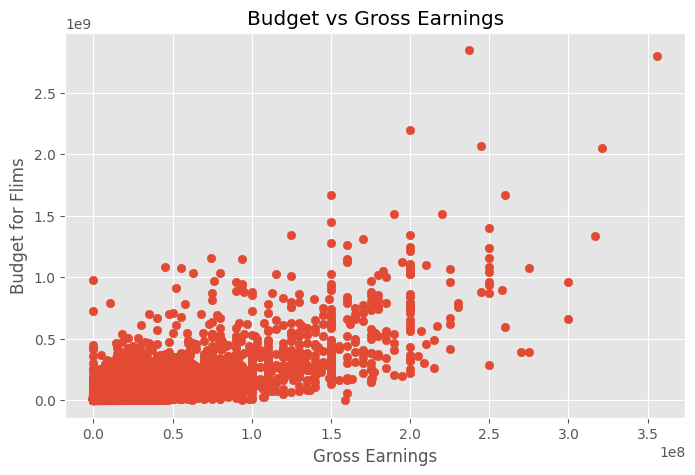

In [74]:
#Scatter plot with budget vs gross
plt.figure(figsize =(8,5))
plt.scatter(data = df, x = 'budget', y ='gross')
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Flims')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

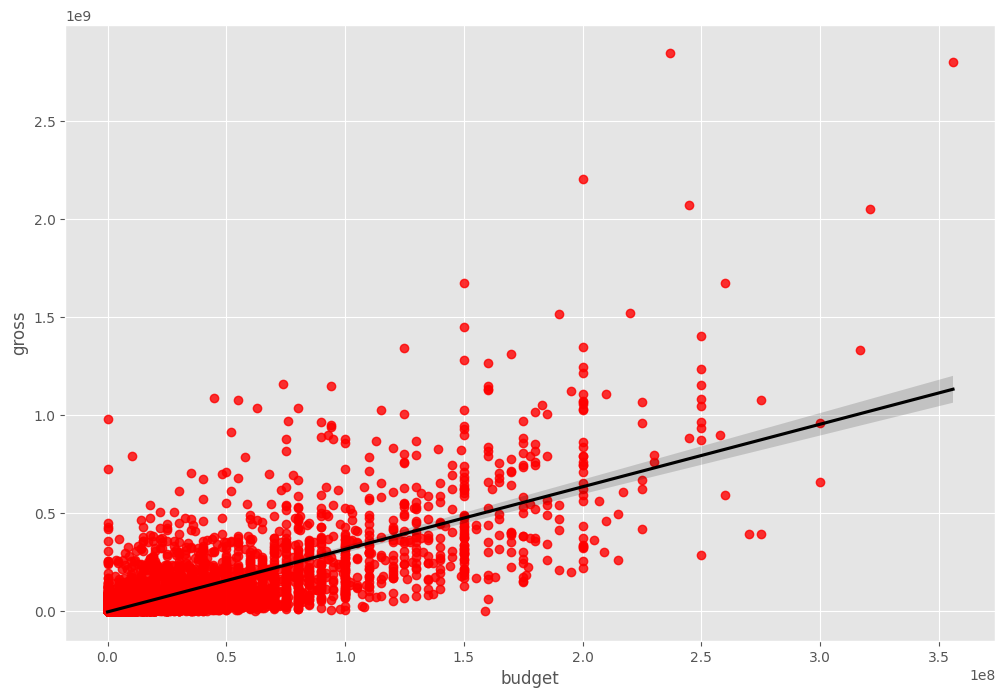

In [75]:
#. plot budget vs gross using seaborn

sns.regplot(x ='budget',y='gross',data = df,scatter_kws={'color':'red'},line_kws={'color':'black'})

In [76]:
#Lets start looking at correlation

In [77]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Calculate the correlation matrix using only numeric columns
corr_matrix = df[numeric_cols].corr(method='pearson')

# Print the correlation matrix
print(corr_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.632834  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632834  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309212  0.269510  0.245235  1.000000


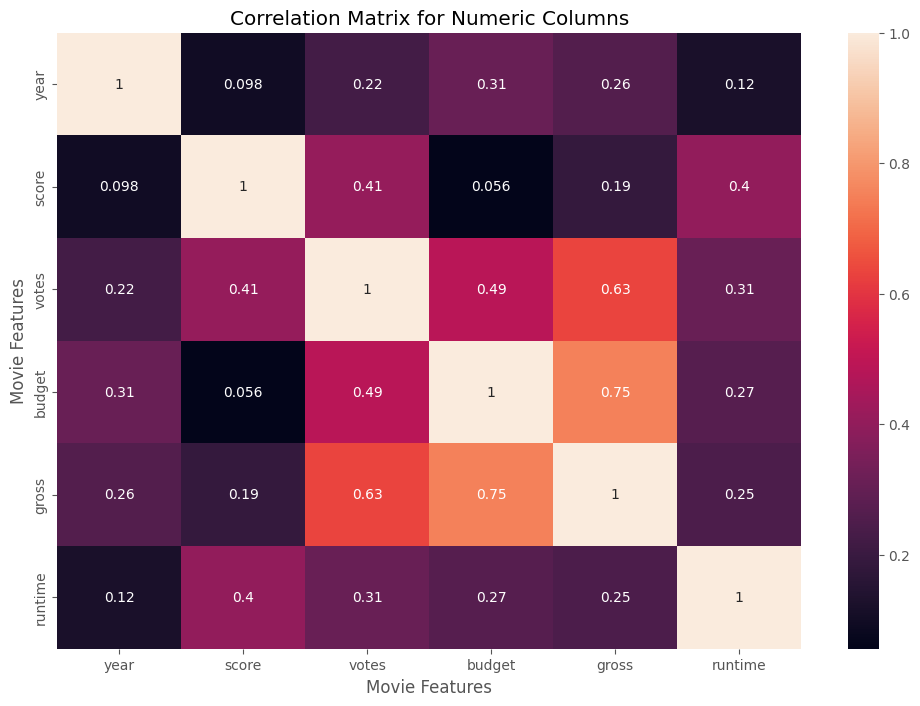

In [78]:
corr_matrix = df[numeric_cols].corr(method='pearson')
sns.heatmap(corr_matrix,annot = True)
plt.title('Correlation Matrix for Numeric Columns')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [79]:
#Look at company

In [98]:
df_numerized = df

for col_name in df_numerized.columns:
  if(df_numerized[col_name].dtype == 'object'):
    df_numerized[col_name] = df_numerized[col_name].astype('category')
    df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0


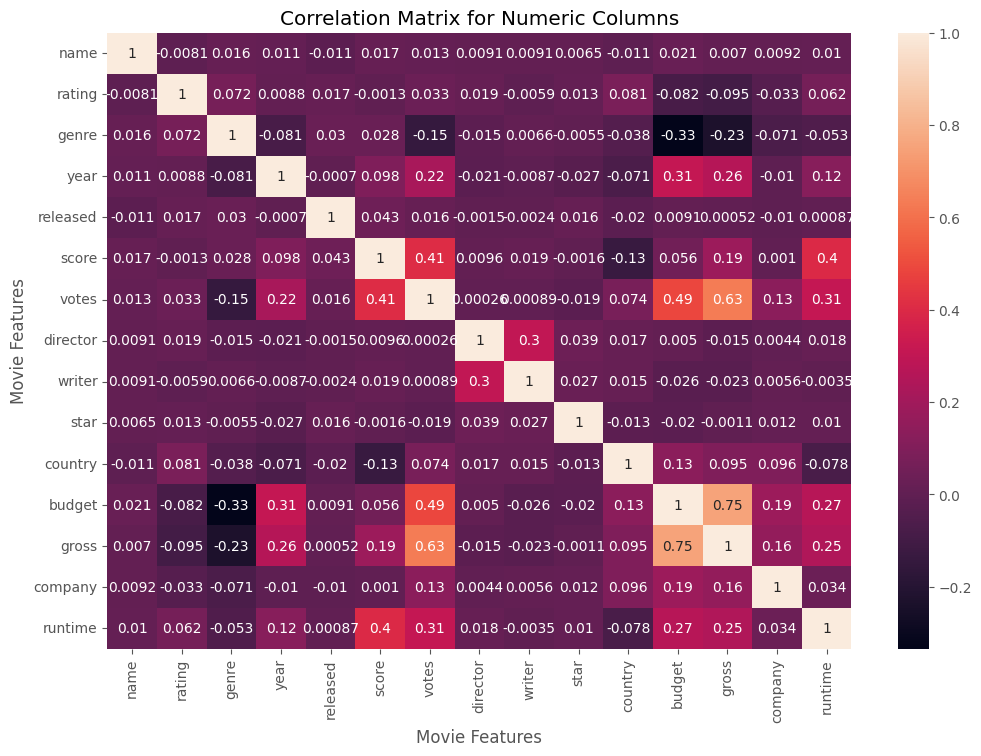

In [83]:
corr_matrix = df_numerized.corr(method='pearson')
sns.heatmap(corr_matrix,annot = True)
plt.title('Correlation Matrix for Numeric Columns')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [91]:
corr_mat = df_numerized.corr()
corr_pairs = corr_mat.unstack()
corr_pairs

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year        0.011453
          released   -0.011311
          score       0.017097
          votes       0.013088
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.020548
          gross       0.006989
          company     0.009211
          runtime     0.010392
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year        0.008779
          released    0.016613
          score      -0.001314
          votes       0.033225
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.081939
          gross      -0.095450
          company    -0.032943
          runtime     0.062145
genre     name        0.016355
          rating      0.072423
          genre       1.000000
          year       -0.081261
          released    0.029822
          score       0.027965
          votes      -0.145307
          director   -0.015258
          writer      0.006567
          star       -0.005477
          country    -0.037615
          budget     -0.334021
          gross      -0.234297
          company    -0.071067
          runtime    -0.052711
year      name        0.011453
          rating      0.008779
          genre      -0.081261
          year        1.000000
          released   -0.000695
          score       0.097995
          votes       0.222945
          director   -0.020795
          writer     -0.008656
          star       -0.027242
          country    -0.070938
          budget      0.309212
          gross       0.261900
          company    -0.010431
          runtime     0.120811
released  name       -0.011311
          rating      0.016613
          genre       0.029822
          year       -0.000695
          released    1.000000
          score       0.042788
          votes       0.016097
          director   -0.001478
          writer     -0.002404
          star        0.015777
          country    -0.020427
          budget      0.009145
          gross       0.000519
          company    -0.010474
          runtime     0.000868
score     name        0.017097
          rating     -0.001314
          genre       0.027965
          year        0.097995
          released    0.042788
          score       1.000000
          votes       0.409182
          director    0.009559
          writer      0.019416
          star       -0.001609
          country    -0.133348
          budget      0.055665
          gross       0.186392
          company     0.001030
          runtime     0.399451
votes     name        0.013088
          rating      0.033225
          genre      -0.145307
          year        0.222945
          released    0.016097
          score       0.409182
          votes       1.000000
          director    0.000260
          writer      0.000892
          star       -0.019282
          country     0.073625
          budget      0.486862
          gross       0.632834
          company     0.133204
          runtime     0.309212
director  name        0.009079
          rating      0.019483
          genre      -0.015258
          year       -0.020795
          released   -0.001478
          score       0.009559
          votes       0.000260
          director    1.000000
          writer      0.299067
          star        0.039234
          country     0.017490
          budget      0.004976
          gross      -0.014916
          company     0.004404
          runtime     0.017624
writer    name        0.009081
          rating     -0.005921
          genre       0.006567
          year       -0.008656
          released   -0.002404
          score       0.019416
          votes       0.000892
          director    0.299067
          writer      1.000000
 

In [92]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre     budget     -0.334021
budget    genre      -0.334021
gross     genre      -0.234297
genre     gross      -0.234297
          votes      -0.145307
votes     genre      -0.145307
country   score      -0.133348
score     country    -0.133348
rating    gross      -0.095450
gross     rating     -0.095450
budget    rating     -0.081939
rating    budget     -0.081939
year      genre      -0.081261
genre     year       -0.081261
runtime   country    -0.078412
country   runtime    -0.078412
genre     company    -0.071067
company   genre      -0.071067
country   year       -0.070938
year      country    -0.070938
runtime   genre      -0.052711
genre     runtime    -0.052711
country   genre      -0.037615
genre     country    -0.037615
company   rating     -0.032943
rating    company    -0.032943
year      star       -0.027242
star      year       -0.027242
writer    budget     -0.025911
budget    writer     -0.025911
gross     writer     -0.022997
writer    gross      -0.022997
director  year       -0.020795
year      director   -0.020795
country   released   -0.020427
released  country    -0.020427
budget    star       -0.019952
star      budget     -0.019952
          votes      -0.019282
votes     star       -0.019282
genre     director   -0.015258
director  genre      -0.015258
gross     director   -0.014916
director  gross      -0.014916
star      country    -0.012998
country   star       -0.012998
name      released   -0.011311
released  name       -0.011311
name      country    -0.010737
country   name       -0.010737
released  company    -0.010474
company   released   -0.010474
          year       -0.010431
year      company    -0.010431
writer    year       -0.008656
year      writer     -0.008656
name      rating     -0.008069
rating    name       -0.008069
writer    rating     -0.005921
rating    writer     -0.005921
star      genre      -0.005477
genre     star       -0.005477
writer    runtime    -0.003511
runtime   writer     -0.003511
released  writer     -0.002404
writer    released   -0.002404
score     star       -0.001609
star      score      -0.001609
released  director   -0.001478
director  released   -0.001478
rating    score      -0.001314
score     rating     -0.001314
star      gross      -0.001129
gross     star       -0.001129
year      released   -0.000695
released  year       -0.000695
votes     director    0.000260
director  votes       0.000260
released  gross       0.000519
gross     released    0.000519
released  runtime     0.000868
runtime   released    0.000868
writer    votes       0.000892
votes     writer      0.000892
score     company     0.001030
company   score       0.001030
director  company     0.004404
company   director    0.004404
director  budget      0.004976
budget    director    0.004976
writer    company     0.005646
company   writer      0.005646
star      name        0.006472
name      star        0.006472
writer    genre       0.006567
genre     writer      0.006567
name      gross       0.006989
gross     name        0.006989
rating    year        0.008779
year      rating      0.008779
name      director    0.009079
director  name        0.009079
name      writer      0.009081
writer    name        0.009081
budget    released    0.009145
released  budget      0.009145
company   name        0.009211
name      company     0.009211
director  score       0.009559
score     director    0.009559
star      runtime     0.010174
runtime   star        0.010174
          name        0.010392
name      runtime     0.010392
year      name        0.011453
name      year        0.011453
company   star        0.012442
star      company     0.012442
votes     name        0.013088
name      votes       0.013088
rating    star        0.013405
star      rating      0.013405
writer    country     0.015343
country   writer      0.015343
star      released    0.015777
released  star        0.015777
          votes       0.016097
votes     released    0.016097
name      genre       0.016355
g

In [93]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

,,0
gross,votes,0.632834
votes,gross,0.632834
budget,gross,0.750157
gross,budget,0.750157
name,name,1.000000
director,director,1.000000
gross,gross,1.000000
budget,budget,1.000000
country,country,1.000000
star,star,1.000000


In [80]:
# budget and gross high correlation
# comapny as low correlation
#I was wrong